In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')

# read in csv
df = pd.read_csv('../data/Production_Crops_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")

# clean column names
cols = df.columns
cols = [col.lower().replace(' ', '_') for col in cols]
new_cols = []
for col in cols:
    if col[0] == 'y':
        new_cols.append(col[1:])
    else:
        new_cols.append(col)
df.columns = new_cols

df = df[df['area_code']<1000]
df = df[df['area'] != 'China, mainland']

In [309]:
def global_change_rate(crop,element='Yield'):
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element)]
    change_rate = []
    for i in range(1,57):
        rate = (np.mean(df_filtered.iloc[:,i+7])/np.mean(df_filtered.iloc[:,i+6]))
        change_rate.append(('{} to {}'.format(df.columns[i+6],df.columns[i+7]),rate -1))
    return change_rate

#getting significant decreases

# def global_significant_rate_decrease(crop,element='Yield',decrease = -.25):
#     rate = global_change_rate(crop,element)
#     rate_decreases = []
#     for item in rate:
#         if item[1] < decrease:
#             rate_decreases.append(item)
#     return rate_decreases

# def all_signficant_decreases():
#     crops = df['item'].unique()
#     crops_decreases = []
#     for crop in crops:
#         decreases = global_significant_rate_decrease(crop)
#         if len(decreases) > 2:
#             crops_decreases.append(crop)
#     return(crops_decreases)


#getting significant increases

def global_significant_rate_increase(crop,element='Yield',increase=.25):
    rate = global_change_rate(crop,element)
    rate_increases = []
    for item in rate:
        if item[1] > increase:
            rate_increases.append(item)
    return rate_increases

def all_signficant_increases(year_threshold,element='Yield',increase=.25):
    crops = df['item'].unique()
    crops_increases = []
    for crop in crops:
        increases = global_significant_rate_increase(crop,element,increase)
        if len(increases) > year_threshold:
            crops_increases.append(crop)
    return crops_increases


In [310]:
all_signficant_increases(20,'Yield',.05)

['Olives', 'Pistachios', 'Quinoa', 'Ramie', 'Hempseed', 'Cloves']

In [311]:
def global_item(crop,element='Yield'):
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element)]
    years = []
    for i in range(1,58):
        year_avg = np.nanmean(df_filtered.iloc[:,i+6])
        years.append((df.columns[i+6],year_avg))
    return years
df[['1990','2017']][(df.item=='Cloves')& (df.element=='Yield')]

,1990,2017
6310,4095.0,13911.0
7624,2265.0,2756.0
15728,1612.0,2258.0
18089,3182.0,10141.0
19939,1188.0,3281.0
20358,2554.0,2296.0
30660,2253.0,10160.0
34529,2474.0,12789.0


In [357]:
import matplotlib as mpl

def plot_crop(crop,element='Yield'):
    fig,ax = plt.subplots(figsize=(16,8))
    lst = global_item(crop,element)
    x=[]
    y=[]
    for i,j in lst:
        x.append(i)
        y.append(j)
    plt.plot (x,y)
#     for label in ax.xaxis.get_ticklabels()[::2]:
#         label.set_visible(False)
    n = 5
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % n != 0:
            label.set_visible(False)
    for label in ax.get_yticklabels():
        label.set_fontsize(12)
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_title('{}, Global {}'.format(crop,element),size=20)
    ax.set_xlabel('Year',size=18)
    ylabel = df.loc[df['element'] == element, 'unit'].head(1).iloc[0]
    ax.set_ylabel(ylabel,size=18)
    plt.savefig('../images/olivesyield.png')

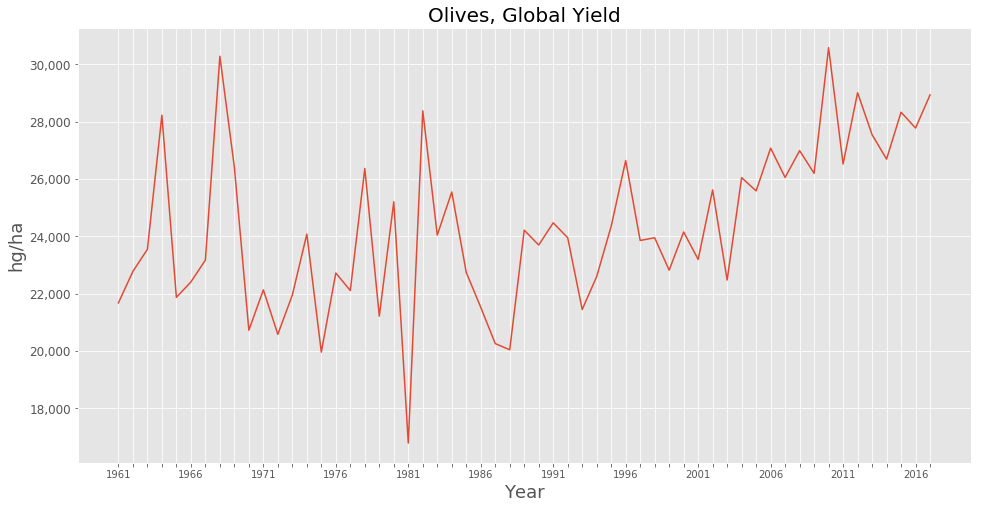

In [358]:
plot_crop('Olives','Yield')

In [117]:
lst = global_item('Olives','Yield')
x=[]
y=[]
for i,j in lst:
    x.append(i)
    y.append(j)
print(np.mean(y))
print(np.std(y))

27262.61934613087
4274.06872173127


In [359]:
def plot_crop_yield_prod(crop):
    fig,axs = plt.subplots(nrows=2,ncols=1,sharey=False,sharex=True,figsize=(16,10))
    element = ['Yield','Production']
    for idx,ax in enumerate(axs.flatten()):
        lst = global_item(crop,element[idx])
        x=[]
        y=[]
        for i,j in lst:
            x.append(i)
            y.append(j)    
        ax.plot (x,y)
        n = 5
        for index, label in enumerate(ax.xaxis.get_ticklabels()):
            if index % n != 0:
                label.set_visible(False)
        for label in ax.get_yticklabels():
            label.set_fontsize(12)
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.set_title('{}, Global {}'.format(crop,element[idx]),size=18)
        ax.set_xlabel('Year',size=18)
        ylabel = df.loc[df['element'] == element[idx], 'unit'].head(1).iloc[0]
        ax.set_ylabel(ylabel,size=18)
    plt.savefig('../images/cloves_yield_prod.png')

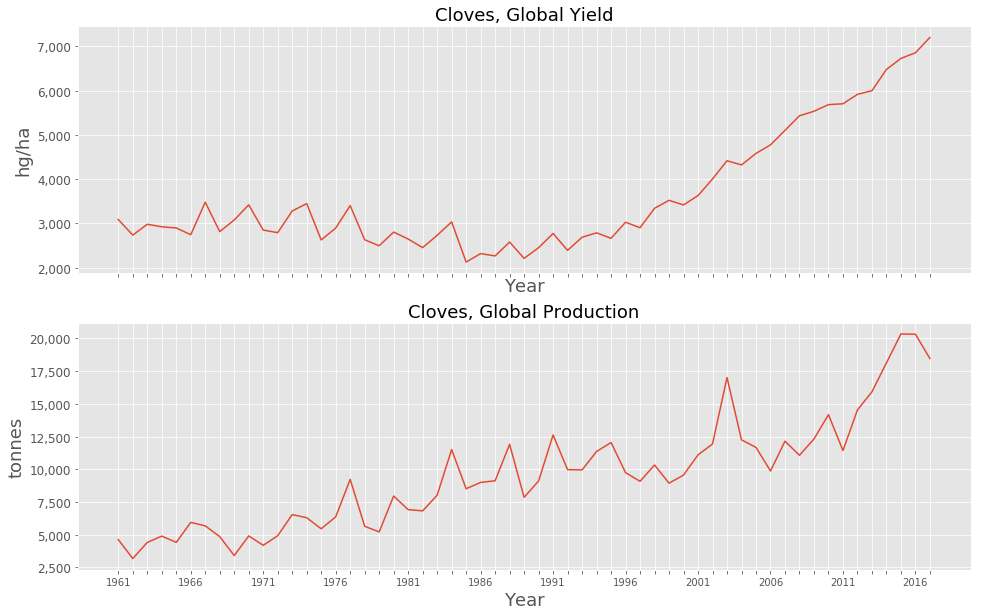

In [360]:
plot_crop_yield_prod('Cloves')

In [316]:
def plot_top_countries(crop,element='Yield'):
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element)]
    df_filtered['avg']=df_filtered.iloc[:,7:].mean(axis=1)
    df_filtered = df_filtered.sort_values('avg',ascending=False).head(5)
    
    fig,ax = plt.subplots(figsize=(16,10))
    
    for i in range(df_filtered.shape[0]):
        x=df_filtered.columns[7:64]
        y=df_filtered.iloc[i,7:64]   
        ax.plot (x,y)
        for label in ax.xaxis.get_ticklabels()[::2]:
            label.set_visible(False)
        ax.set_title('{}, {} by Country'.format(crop,element),size=18)
        ax.set_xlabel('Year',size=18)
        ylabel = df_filtered['unit'].head(1).iloc[0]
        ax.set_ylabel(ylabel,size=18)
        ax.legend(labels=df_filtered['area'].values)
    plt.savefig('../images/clovesyieldcountries.png')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


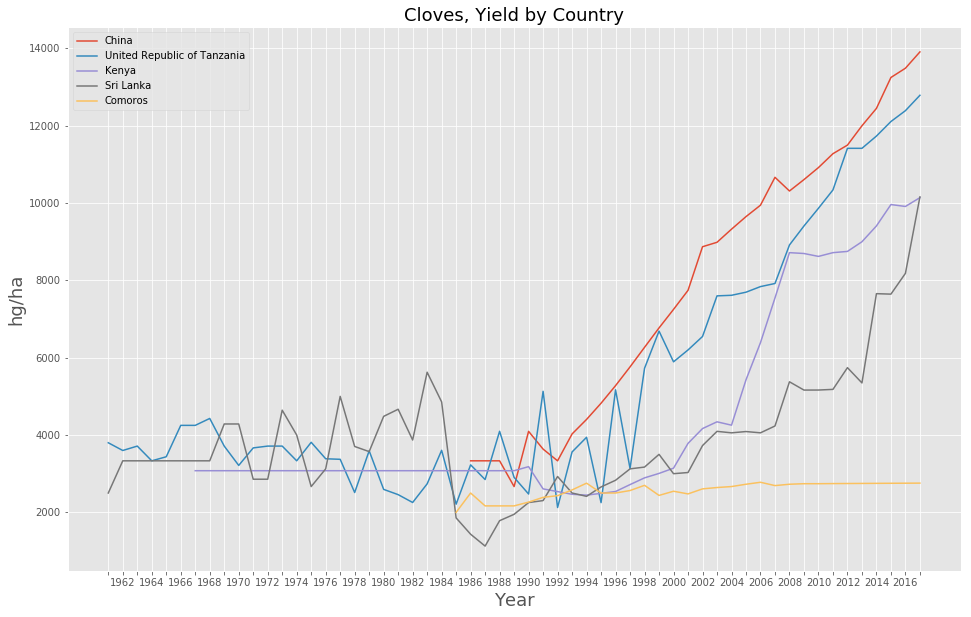

In [317]:
plot_top_countries('Cloves','Yield')

In [261]:
def global_change_rate(crop,element='Yield'):
    df_filtered = df.loc[(df['item'] == crop) & (df['element'] == element)]
    change_rate = []
    for i in range(1,57):
        rate = (np.mean(df_filtered.iloc[:,i+7])/np.mean(df_filtered.iloc[:,i+6]))
        change_rate.append(('{} to {}'.format(df.columns[i+6],df.columns[i+7]),rate -1))
    return change_rate
global_change_rate('Avocados')

[('1961 to 1962', 0.004804371204696789),
 ('1962 to 1963', -0.0026374063845140405),
 ('1963 to 1964', -0.012645819940318992),
 ('1964 to 1965', -0.006313127386712858),
 ('1965 to 1966', -0.023990595911725254),
 ('1966 to 1967', 0.03104760828326336),
 ('1967 to 1968', -0.0019541522528339073),
 ('1968 to 1969', -0.020397122098865683),
 ('1969 to 1970', -0.050620969418661566),
 ('1970 to 1971', -0.0038807007135468474),
 ('1971 to 1972', 0.00810404649390084),
 ('1972 to 1973', -0.015541061499790065),
 ('1973 to 1974', -0.03283670574815567),
 ('1974 to 1975', 0.026307683115984082),
 ('1975 to 1976', -0.03960559223160032),
 ('1976 to 1977', 0.0026777012782746024),
 ('1977 to 1978', -0.02416096317247085),
 ('1978 to 1979', 0.013593339987262976),
 ('1979 to 1980', 0.04124701552661558),
 ('1980 to 1981', -0.05928968252878353),
 ('1981 to 1982', 0.028736221325872835),
 ('1982 to 1983', 0.029624763239393115),
 ('1983 to 1984', -0.022619390530007055),
 ('1984 to 1985', -0.10813929139816447),
 ('19